In [25]:
from datapress import DataPressClient

# Or pass credentials explicitly
client = DataPressClient(
    api_key="c79abd2f-f377-4d22-ba84-f6ff0def3075",
    base_url="https://data.london.gov.uk"
)

# Verify authentication
user_info = client.whoami()
print(f"Logged in as: {user_info['title']}")

Logged in as: iholdroyd


In [26]:
dataset = client.get_dataset("mps-monthly-crime-dashboard-data-e5n6w")
print(f"Dataset: {dataset['title']}")
print(f"Resources: {len(dataset['resources'])}")


Dataset: MPS Monthly Crime Dashboard Data
Resources: 100


In [27]:
dataset['resources']['628']['url']

'https://data.london.gov.uk/download/e5n6w/628/M1045_MonthlyCrimeDashboard_TNOCrimeData.xlsx'

In [28]:
import pandas as pd
import requests
import io

resource_id = '628'
if resource_id in dataset['resources']:
    target_resource = dataset['resources'][resource_id]
    excel_url = target_resource['url']
    print(f"Loading data from: {excel_url}")
    
    # Define a browser-like header
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        # Request the file with headers
        response = requests.get(excel_url, headers=headers)
        response.raise_for_status() # Check for other HTTP errors
        
        # Load the content into pandas using BytesIO
        df = pd.read_excel(io.BytesIO(response.content), engine='openpyxl')
        
        print("Data loaded successfully into variable 'df'!")
        print(df.head())
    except Exception as e:
        print(f"Error loading data: {e}")
else:
    print(f"Resource {resource_id} not found.")

Loading data from: https://data.london.gov.uk/download/e5n6w/628/M1045_MonthlyCrimeDashboard_TNOCrimeData.xlsx


KeyboardInterrupt: 

In [29]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date'],
      dtype='object')

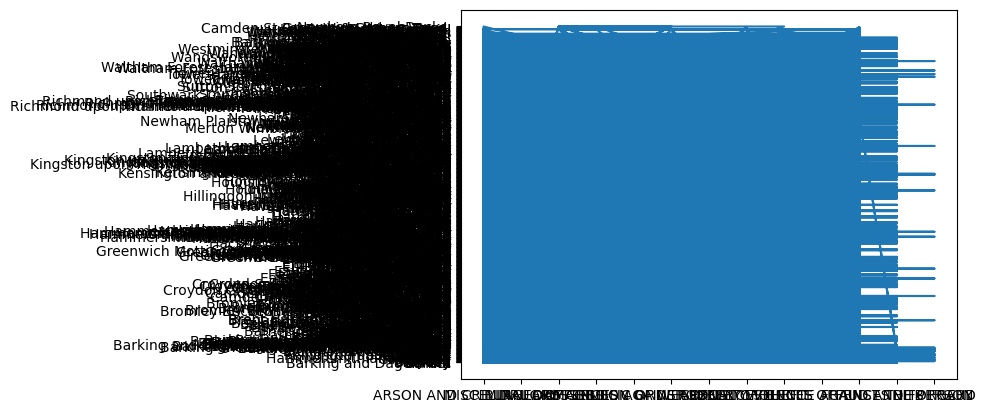

In [32]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date'],
      dtype='object')

In [36]:
df['Area name'].value_counts()


Area name
Other / NK                               7313
Westminster                              2459
Queens Park                              2449
Newham                                   2448
Tower Hamlets                            2422
                                         ... 
Clapham Town (NOT ACTIVE)                   2
St Pancras & Somers Town (NOT ACTIVE)       2
Grove Green (NOT ACTIVE)                    1
Vincent Square (NOT ACTIVE)                 1
Alperton (NOT ACTIVE)                       1
Name: count, Length: 731, dtype: int64